# What factors determine the success or popularity of a business?
In this notebook we are going to see how we could make sure our dream business venture succeed despite neighboring competition all around. There will be a lot of factors to take into account such as the kind of food we serve, our location , and even the cost of our products. Until now we haven't decided what kind of business to create but rather we're just looking to analyze the market on a cursory level in this notebook and in subsequent ones we plan on going further in depth with regressions including multiple independent variables , time-series analysis, etc.

To begin we'll import some need libraries

In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery
import configparser
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

Now we'll be setting up authentication to connect to our data warehouse in Google Big Query

In [2]:
KEY_PATH = "/mnt/c/Users/Ron/git-repos/yelp-data/gourmanddwh-f75384f95e86.json"
CREDS = service_account.Credentials.from_service_account_file(KEY_PATH)
client = bigquery.Client(credentials=CREDS, project=CREDS.project_id)

Using the bigquery API we can use select statements to place the results in pandas dataframes so we'll do so for a couple of queries


In [3]:
cg_file = open('sql_scripts/county_growth_est.sql','r')
county_growth_query =  cg_file.read()
cg_dataframe = (
    client.query(county_growth_query)
    .result()
    .to_dataframe()
)

In [4]:
holding_file = open('sql_scripts/business_daily_holding.sql')
holding_query = holding_file.read()

holding_dataframe = (
    client.query(holding_query)
    .result()
    .to_dataframe()
)

In [5]:
bus_cat_file = open('sql_scripts/business_category_location.sql')
bus_cat_query = bus_cat_file.read()

bus_cat_dataframe = (
    client.query(bus_cat_query)
    .result()
    .to_dataframe()
)

explain differences from previous year

In [14]:
cg_dataframe

,StateName,CountyName,EstimationYear,EstimatedPopulation,lastpop,relative_delta,abs_delta
0,California,Siskiyou County,2019,43539,43550,-0.00,-11
1,Colorado,Saguache County,2019,6824,6840,-0.00,-16
2,Indiana,Madison County,2019,129569,129573,-0.00,-4
3,Kansas,Franklin County,2019,25544,25625,-0.00,-81
4,Kentucky,Green County,2019,10941,10998,-0.01,-57
...,...,...,...,...,...,...,...
3215,South Dakota,Jones County,2019,903,928,-0.03,-25
3216,Tennessee,Hardeman County,2019,25050,25276,-0.01,-226
3217,Texas,Scurry County,2019,16703,16812,-0.01,-109
3218,Wisconsin,Pierce County,2019,42754,42592,0.00,162


Making slight changes on the data types

In [15]:
holding_dataframe

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2021-12-29,NaN,None,NaN,None,0.00,0E-9
1,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-07,2.00,3.000000000,0.00,0E-9,0.00,0E-9
2,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-08,2.00,3.000000000,0.00,0E-9,0.00,0E-9
3,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-09,2.00,3.000000000,0.00,0E-9,0.00,0E-9
4,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-10,2.00,3.000000000,0.00,0E-9,0.00,0E-9
...,...,...,...,...,...,...,...,...,...,...,...
510424,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-09,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510425,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-10,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510426,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-11,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510427,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-12,2.00,4.000000000,0.00,0E-9,0.00,0E-9


In [16]:
holding_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510429 entries, 0 to 510428
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BusinessName            510429 non-null  object        
 1   ChainName               510429 non-null  object        
 2   BusinessRating          510429 non-null  object        
 3   ReviewCount             510429 non-null  int64         
 4   CloseDate               510429 non-null  datetime64[ns]
 5   previous_review_cnt     447112 non-null  float64       
 6   previous_rating         447112 non-null  object        
 7   abs_review_diff         447112 non-null  float64       
 8   abs_rating_diff         447112 non-null  object        
 9   total_review_cnt_delta  509680 non-null  float64       
 10  total_bus_rating_delta  509680 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 42.8+ MB


In [19]:
holding_dataframe['CloseDate'] = pd.to_datetime(holding_dataframe['CloseDate'])
holding_dataframe[['BusinessRating', 'previous_rating', 'abs_rating_diff', 'total_bus_rating_delta']] = holding_dataframe[['BusinessRating', 'previous_rating', 'abs_rating_diff', 'total_bus_rating_delta']].astype(float)

In [20]:
holding_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510429 entries, 0 to 510428
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BusinessName            510429 non-null  object        
 1   ChainName               510429 non-null  object        
 2   BusinessRating          510429 non-null  float64       
 3   ReviewCount             510429 non-null  int64         
 4   CloseDate               510429 non-null  datetime64[ns]
 5   previous_review_cnt     447112 non-null  float64       
 6   previous_rating         447112 non-null  float64       
 7   abs_review_diff         447112 non-null  float64       
 8   abs_rating_diff         447112 non-null  float64       
 9   total_review_cnt_delta  509680 non-null  float64       
 10  total_bus_rating_delta  509680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 42.8+ MB


In [21]:
holding_dataframe

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2021-12-29,NaN,NaN,NaN,NaN,0.00,0.00
1,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-07,2.00,3.00,0.00,0.00,0.00,0.00
2,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-08,2.00,3.00,0.00,0.00,0.00,0.00
3,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-09,2.00,3.00,0.00,0.00,0.00,0.00
4,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-10,2.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
510424,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-09,2.00,4.00,0.00,0.00,0.00,0.00
510425,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-10,2.00,4.00,0.00,0.00,0.00,0.00
510426,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-11,2.00,4.00,0.00,0.00,0.00,0.00
510427,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-12,2.00,4.00,0.00,0.00,0.00,0.00


In [9]:
bus_cat_dataframe

,BusinessKey,BusinessName,ChainName,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,CountryName
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.868675000,30.614799000,American (Traditional),Daphne,Baldwin County,Alabama,US
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.868675000,30.614799000,Food Trucks,Daphne,Baldwin County,Alabama,US
2,33,chris-hot-dogs-montgomery-2,Chris' Hot Dogs,Very Low,-86.306631000,32.377287000,Hot Dogs,Montgomery,Autauga County,Alabama,US
3,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.190163000,30.662022000,Sushi Bars,Mobile,Mobile County,Alabama,US
4,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.190163000,30.662022000,Thai,Mobile,Mobile County,Alabama,US
...,...,...,...,...,...,...,...,...,...,...,...
126522,62893,munchies-evanston,Munchies,Unknown,-110.965810000,41.268390000,Hot Dogs,Evanston,Uinta County,Wyoming,US
126523,63106,don-juan-mexican-restaurant-casper,Don Juan Mexican Restaurant,Very Low,-106.325400000,42.849180000,Mexican,Casper,Natrona County,Wyoming,US
126524,63128,the-hangar-bar-and-grill-bar-nunn,The Hangar Bar And Grill,Low,-106.342377000,42.914669000,American (Traditional),Bar Nunn,Natrona County,Wyoming,US
126525,63155,wyoming-hot-wings-casper,Wyoming Hot Wings,Low,-106.302002000,42.838868000,Chicken Wings,Casper,Converse County,Wyoming,US


In [22]:
bus_cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126527 entries, 0 to 126526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   BusinessKey           126527 non-null  int64 
 1   BusinessName          126527 non-null  object
 2   ChainName             126527 non-null  object
 3   PaymentLevelName      126527 non-null  object
 4   Longitude             126526 non-null  object
 5   Latitude              126526 non-null  object
 6   BusinessCategoryName  126527 non-null  object
 7   CityName              126527 non-null  object
 8   CountyName            126527 non-null  object
 9   StateName             126527 non-null  object
 10  CountryName           126527 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.6+ MB


We'll pause to serialize the data before we start any more transforms to retain it's state. 

In [23]:
cg_dataframe.to_csv('county_growth_est.csv',sep='|', index=False )
holding_dataframe.to_csv('holding.csv',sep='|', index=False )
bus_cat_dataframe.to_csv('bus_cat.csv',sep='|', index=False )

Now we'll read the data back in and conduct some exploratory analysis

In [3]:
cg_dataframe = pd.read_csv('county_growth_est.csv',sep='|', low_memory=True)
holding_dataframe = pd.read_csv('holding.csv',sep='|', low_memory=True)
bus_cat_dataframe = pd.read_csv('bus_cat.csv',sep='|', low_memory=True)

The dataset `cg_dataframe` shows us some estimated population statistics for the year 2019. We will look into what impact this year by have on the rest of our data as it comes 2021/2022

In [4]:
cg_dataframe

,StateName,CountyName,EstimationYear,EstimatedPopulation,lastpop,relative_delta,abs_delta
0,California,Siskiyou County,2019,43539,43550,-0.00,-11
1,Colorado,Saguache County,2019,6824,6840,-0.00,-16
2,Indiana,Madison County,2019,129569,129573,-0.00,-4
3,Kansas,Franklin County,2019,25544,25625,-0.00,-81
4,Kentucky,Green County,2019,10941,10998,-0.01,-57
...,...,...,...,...,...,...,...
3215,South Dakota,Jones County,2019,903,928,-0.03,-25
3216,Tennessee,Hardeman County,2019,25050,25276,-0.01,-226
3217,Texas,Scurry County,2019,16703,16812,-0.01,-109
3218,Wisconsin,Pierce County,2019,42754,42592,0.00,162


The dataset `holding_dataframe` shows us some of the business' ratings and review counts with which a business closed out on a particular day. That's to say that we have duplicates of each business itself and we are seeing their changes on each day. Fortunately the column `total_review_cnt_delta` gives us the total absolute change for a business from it's start date to the end date.

In [5]:
holding_dataframe.sort_values(['total_review_cnt_delta', 'CloseDate'], ascending = False).head(10)

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
199943,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,414,2022-01-13,410.00,5.00,4.00,0.00,74.00,0.00
199942,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,410,2022-01-12,413.00,5.00,-3.00,0.00,74.00,0.00
199941,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,413,2022-01-11,414.00,5.00,-1.00,0.00,74.00,0.00
199940,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,414,2022-01-10,413.00,5.00,1.00,0.00,74.00,0.00
199939,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,413,2022-01-09,408.00,5.00,5.00,0.00,74.00,0.00
199938,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,408,2022-01-08,401.00,5.00,7.00,0.00,74.00,0.00
199937,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,401,2022-01-07,401.00,5.00,0.00,0.00,74.00,0.00
199936,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,401,2022-01-06,340.00,5.00,61.00,0.00,74.00,0.00
199935,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,340,2021-12-29,NaN,NaN,NaN,NaN,74.00,0.00
160877,founding-farmers-washington-washington-3,Founding Farmers - Washington,4.00,14427,2022-01-13,"14,422.00",4.00,5.00,0.00,70.00,0.00


A good example is the business **houstons-hot-chicken-henderson-3** if you add up the changes by each day (conveniently shown by the column `abs_review_diff`) then you'll be able to see that this business had an increase of 74 reviews! However One must keep in mind that 61 of those came over the span of about 8 days.

So we're going to keep the last close out date for each business and see which categories, payment levels, etc see the most changes in their reviews.

In [6]:
most_recent_holding = holding_dataframe.sort_values(['BusinessName', 'CloseDate'], ascending = False).drop_duplicates(subset=['BusinessName'] , keep='first')
most_recent_holding

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
510428,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-13,2.00,4.00,0.00,0.00,0.00,0.00
510420,ándale-caguas-2,Ándale,5.00,3,2022-01-13,3.00,5.00,0.00,0.00,0.00,0.00
510412,àlavita-boise-2,ÀLAVITA,4.00,304,2022-01-13,304.00,4.00,0.00,0.00,0.00,0.00
510402,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.00,1,2022-01-13,1.00,5.00,0.00,0.00,0.00,0.00
510394,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.50,10,2022-01-13,10.00,3.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
39,10-40-coffee-west-plains,10/40 Coffee,5.00,11,2022-01-13,11.00,5.00,0.00,0.00,0.00,0.00
31,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.00,149,2022-01-13,149.00,4.00,0.00,0.00,2.00,0.00
23,1-more-bar-and-grille-bright,1 More Bar & Grille,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,0.00,0.00
15,1-cow-ten-sleep,1 Cow,4.50,6,2022-01-13,6.00,4.50,0.00,0.00,0.00,0.00


The resulting amount is 63317 businesses which is expected since that is the number of businesses we are tracking.

Let's pause briefly there to take a look at out next dataset.

The dataset `bus_cat_dataframe` provides additional information about each business such as location, the categories offered by the business and as such it contains duplicates businesses (a business instance for each of it's categories). For example `mcdonalds-geneva` is shown 3 times as it is categorized as a business specializing in "Burgers", "Coffee & Tea", "Fast Food"

In [7]:
bus_cat_dataframe

,BusinessKey,BusinessName,ChainName,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,CountryName
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,US
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,Food Trucks,Daphne,Baldwin County,Alabama,US
2,33,chris-hot-dogs-montgomery-2,Chris' Hot Dogs,Very Low,-86.31,32.38,Hot Dogs,Montgomery,Autauga County,Alabama,US
3,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Sushi Bars,Mobile,Mobile County,Alabama,US
4,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Thai,Mobile,Mobile County,Alabama,US
...,...,...,...,...,...,...,...,...,...,...,...
126522,62893,munchies-evanston,Munchies,Unknown,-110.97,41.27,Hot Dogs,Evanston,Uinta County,Wyoming,US
126523,63106,don-juan-mexican-restaurant-casper,Don Juan Mexican Restaurant,Very Low,-106.33,42.85,Mexican,Casper,Natrona County,Wyoming,US
126524,63128,the-hangar-bar-and-grill-bar-nunn,The Hangar Bar And Grill,Low,-106.34,42.91,American (Traditional),Bar Nunn,Natrona County,Wyoming,US
126525,63155,wyoming-hot-wings-casper,Wyoming Hot Wings,Low,-106.30,42.84,Chicken Wings,Casper,Converse County,Wyoming,US


Now we'll visualize some of the data a bit to try and get a better perspective

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
most_recent_holding = most_recent_holding.reset_index(drop=True)
most_recent_holding

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-13,2.00,4.00,0.00,0.00,0.00,0.00
1,ándale-caguas-2,Ándale,5.00,3,2022-01-13,3.00,5.00,0.00,0.00,0.00,0.00
2,àlavita-boise-2,ÀLAVITA,4.00,304,2022-01-13,304.00,4.00,0.00,0.00,0.00,0.00
3,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.00,1,2022-01-13,1.00,5.00,0.00,0.00,0.00,0.00
4,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.50,10,2022-01-13,10.00,3.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63312,10-40-coffee-west-plains,10/40 Coffee,5.00,11,2022-01-13,11.00,5.00,0.00,0.00,0.00,0.00
63313,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.00,149,2022-01-13,149.00,4.00,0.00,0.00,2.00,0.00
63314,1-more-bar-and-grille-bright,1 More Bar & Grille,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,0.00,0.00
63315,1-cow-ten-sleep,1 Cow,4.50,6,2022-01-13,6.00,4.50,0.00,0.00,0.00,0.00


array([[<AxesSubplot:title={'center':'BusinessRating'}>,
        <AxesSubplot:title={'center':'ReviewCount'}>,
        <AxesSubplot:title={'center':'previous_review_cnt'}>],
       [<AxesSubplot:title={'center':'previous_rating'}>,
        <AxesSubplot:title={'center':'abs_review_diff'}>,
        <AxesSubplot:title={'center':'abs_rating_diff'}>],
       [<AxesSubplot:title={'center':'total_review_cnt_delta'}>,
        <AxesSubplot:title={'center':'total_bus_rating_delta'}>,
        <AxesSubplot:>]], dtype=object)

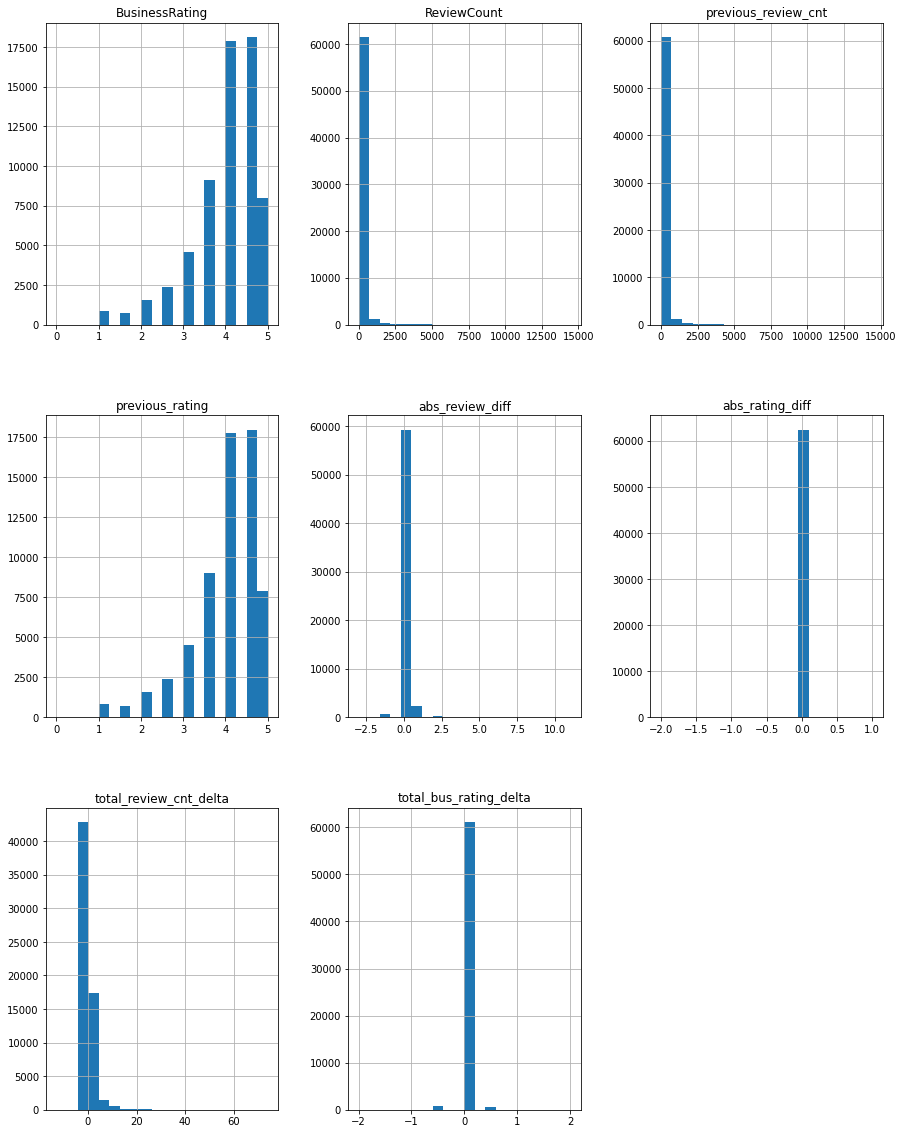

In [11]:
most_recent_holding.hist(bins=20,figsize=(15,20))

Over the span of a week or two our businesses haven't changed too much it seems when we take a look at their total review count change or even the rating change. We can also take a more granular look at the data

In [15]:
print(most_recent_holding['total_review_cnt_delta'].value_counts(bins=10, normalize=True, sort=False))
print('\n')
print(most_recent_holding['total_review_cnt_delta'].value_counts(bins=10, sort=False))

(-13.088, -4.3]   0.00
(-4.3, 4.4]       0.95
(4.4, 13.1]       0.03
(13.1, 21.8]      0.00
(21.8, 30.5]      0.00
(30.5, 39.2]      0.00
(39.2, 47.9]      0.00
(47.9, 56.6]      0.00
(56.6, 65.3]      0.00
(65.3, 74.0]      0.00
Name: total_review_cnt_delta, dtype: float64


(-13.088, -4.3]        7
(-4.3, 4.4]        60232
(4.4, 13.1]         2015
(13.1, 21.8]         203
(21.8, 30.5]          75
(30.5, 39.2]          18
(39.2, 47.9]           6
(47.9, 56.6]           2
(56.6, 65.3]           8
(65.3, 74.0]           2
Name: total_review_cnt_delta, dtype: int64


> **separate the extreme_values to check them out later**

To begin bus_cat_dataframe and holding_dataframe will be merged to get some summary statistics 

In [13]:
bus_cat_holding= bus_cat_dataframe.merge(right=holding_dataframe, how='inner', on = 'BusinessName')

In [14]:
bus_cat_holding

,BusinessKey,BusinessName,ChainName_x,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,...,ChainName_y,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,4,mcdonalds-geneva,McDonald's,Very Low,-85.891314,31.047660,Coffee & Tea,Geneva,Geneva County,Alabama,...,McDonald's,1.0,3,2021-12-29,NaN,NaN,NaN,NaN,"{:,.2f}",0.0
1,4,mcdonalds-geneva,McDonald's,Very Low,-85.891314,31.047660,Coffee & Tea,Geneva,Geneva County,Alabama,...,McDonald's,1.0,3,2022-01-04,"{:,.2f}",1.0,"{:,.2f}",0.0,"{:,.2f}",0.0
2,4,mcdonalds-geneva,McDonald's,Very Low,-85.891314,31.047660,Coffee & Tea,Geneva,Geneva County,Alabama,...,McDonald's,1.0,3,2022-01-06,"{:,.2f}",1.0,"{:,.2f}",0.0,"{:,.2f}",0.0
3,4,mcdonalds-geneva,McDonald's,Very Low,-85.891314,31.047660,Coffee & Tea,Geneva,Geneva County,Alabama,...,McDonald's,1.0,3,2022-01-07,"{:,.2f}",1.0,"{:,.2f}",0.0,"{:,.2f}",0.0
4,4,mcdonalds-geneva,McDonald's,Very Low,-85.891314,31.047660,Coffee & Tea,Geneva,Geneva County,Alabama,...,McDonald's,1.0,3,2022-01-08,"{:,.2f}",1.0,"{:,.2f}",0.0,"{:,.2f}",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895212,63293,sallys-classic-pizza-worland,Sally's Classic Pizza,Unknown,-107.952732,44.016797,Pizza,Worland,Hot Springs County,Wyoming,...,Sally's Classic Pizza,2.5,11,2022-01-08,"{:,.2f}",2.5,"{:,.2f}",0.0,"{:,.2f}",0.0
895213,63293,sallys-classic-pizza-worland,Sally's Classic Pizza,Unknown,-107.952732,44.016797,Pizza,Worland,Hot Springs County,Wyoming,...,Sally's Classic Pizza,2.5,11,2022-01-09,"{:,.2f}",2.5,"{:,.2f}",0.0,"{:,.2f}",0.0
895214,63293,sallys-classic-pizza-worland,Sally's Classic Pizza,Unknown,-107.952732,44.016797,Pizza,Worland,Hot Springs County,Wyoming,...,Sally's Classic Pizza,2.5,11,2022-01-10,"{:,.2f}",2.5,"{:,.2f}",0.0,"{:,.2f}",0.0
895215,63293,sallys-classic-pizza-worland,Sally's Classic Pizza,Unknown,-107.952732,44.016797,Pizza,Worland,Hot Springs County,Wyoming,...,Sally's Classic Pizza,2.5,11,2022-01-11,"{:,.2f}",2.5,"{:,.2f}",0.0,"{:,.2f}",0.0


Now we'll group by categoryname and check out some aggregates results

In [15]:
cat_groups = bus_cat_holding.groupby(['BusinessCategoryName'], as_index=False)[['ReviewCount','BusinessRating']].agg({"ReviewCount": ['sum', 'mean', 'max'], "BusinessRating": ['mean', 'max']})
cat_groups

BusinessCategoryName ReviewCount                   BusinessRating     
                                 sum        mean   max           mean  max
0      ATV Rentals/Tours         960   25.263158    55       4.171053  5.0
1             Acai Bowls       34697  103.264881   530       4.434524  5.0
2            Accessories         550    7.746479    53       4.260563  5.0
3            Active Life          40    5.000000     5       4.500000  4.5
4           Aerial Tours        1016  127.000000   128       3.000000  3.0
..                   ...         ...         ...   ...            ...  ...
526                Wraps      101828   67.794940  1057       4.198402  5.0
527          Yelp Events        1438   28.196078   129       4.882353  5.0
528                 Yoga         937   16.438596    36       4.745614  5.0
529            Ziplining        8213   75.348624   184       4.628440  5.0
530                 Zoos      103922  140.815718  1162       4.406504  5.0

[531 rows x 6 columns]

Here we took a some of the review count which isn't the best statistic considering our data consists of review counts at the end of each data however it does give some insight into the most visited businesses.\
To make more sense of the data it would be best to sort on some columns

In [16]:
cat_groups_Sorted = cat_groups.sort_values(by=[('ReviewCount', 'mean'), ('BusinessRating', 'mean'), ('ReviewCount', 'sum')], ascending=False)
cat_groups_Sorted.head(10)

BusinessCategoryName ReviewCount                    BusinessRating     
                                 sum         mean   max           mean  max
382       Public Markets       39901  5700.142857  5708       4.500000  4.5
418         Shanghainese      142887  1536.419355  6561       4.059140  4.5
176             Eritrean        8127  1161.000000  1162       4.500000  4.5
254              Iberian       15800  1128.571429  2107       4.000000  4.0
84               Burmese       79695   971.890244  7012       4.323171  5.0
266              Izakaya       83542   928.244444  3228       4.211111  4.5
293        Live/Raw Food      192531   899.677570  7566       4.301402  5.0
73            Brasseries       53209   831.390625  3985       4.226562  4.5
481       Train Stations       11501   821.500000  1430       4.250000  4.5
438        South African       10837   774.071429  1544       4.750000  5.0

What's interesting is that these businesses seem to be very niche and don't seem that they would be frequented by a diverse range of visitors aside from the public markets \
We're going to modify our sort and see what happens

In [17]:
cat_groups_Sorted = cat_groups.sort_values(by=[('ReviewCount', 'sum'), ('ReviewCount', 'mean'),  ('BusinessRating', 'mean')], ascending=False)
cat_groups_Sorted.head(10)

BusinessCategoryName ReviewCount                    BusinessRating     
                                    sum        mean    max           mean  max
75       Breakfast & Brunch     8469691  204.982962  14422       4.044338  5.0
10   American (Traditional)     7822797  124.297652  14422       3.834657  5.0
9            American (New)     6743675  254.708982   8949       4.057448  5.0
413                 Seafood     5919702  223.985092   7566       3.949052  5.0
408              Sandwiches     4795079  110.170917  13230       3.872771  5.0
43                     Bars     4312093  168.027627   8857       3.967930  5.0
362                   Pizza     4044091   89.063162   6442       3.777138  5.0
83                  Burgers     3768463   85.120686   5933       3.420074  5.0
305                 Mexican     3463592   83.019942   5082       3.879710  5.0
265                 Italian     3460560  170.185896   6442       3.985787  5.0

Here we get a different picture but it could be perhaps misleading shown by the following business category counts

In [18]:
bus_cat_holding.groupby(['BusinessCategoryName'], as_index=False)['BusinessName'].count().sort_values(by=[
    'BusinessName'], ascending=False).head(10)

,BusinessCategoryName,BusinessName
10,American (Traditional),62936
362,Pizza,45407
83,Burgers,44272
408,Sandwiches,43524
305,Mexican,41720
75,Breakfast & Brunch,41319
123,Coffee & Tea,35717
184,Fast Food,35604
9,American (New),26476
413,Seafood,26429


Here a decision has to be made do would we really want to go in the above industries knowing there is going to be much competition? Maybe that's a good sign showing less barriers to entry?
Checking the first set of criteria the businesses categories seem rather diffcult to break into so we will decide to stick with the more common business.
